 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_df = pd.read_csv('whale_returns.csv', index_col = 'Date',infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_values(by = 'Date',inplace = True)

In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv('algo_returns.csv', index_col = 'Date',infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_values(by = 'Date',inplace = True)

In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_hist_df = pd.read_csv('sp_tsx_history.csv',index_col = 'Date',infer_datetime_format=True, parse_dates=True)
sp_tsx_hist_df.sort_values(by = 'Date',inplace = True)

In [9]:
# Check Data Types
sp_tsx_hist_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_hist_df['Close']=sp_tsx_hist_df['Close'].str.replace('$','')
sp_tsx_hist_df['Close']=sp_tsx_hist_df['Close'].str.replace(',','')
sp_tsx_hist_df['Close']=sp_tsx_hist_df['Close'].astype("float64")

C:\Users\amany\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [11]:
# Calculate Daily Returns
sp_tsx_hist_daily_returns= sp_tsx_hist_df.pct_change() 



In [12]:
# Drop nulls
sp_tsx_hist_daily_returns.dropna(inplace = True)


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_hist_daily_returns.rename(columns={'Close':'SP and TSX Daily Return'}, inplace = True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_hist_daily_returns],axis=1, join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

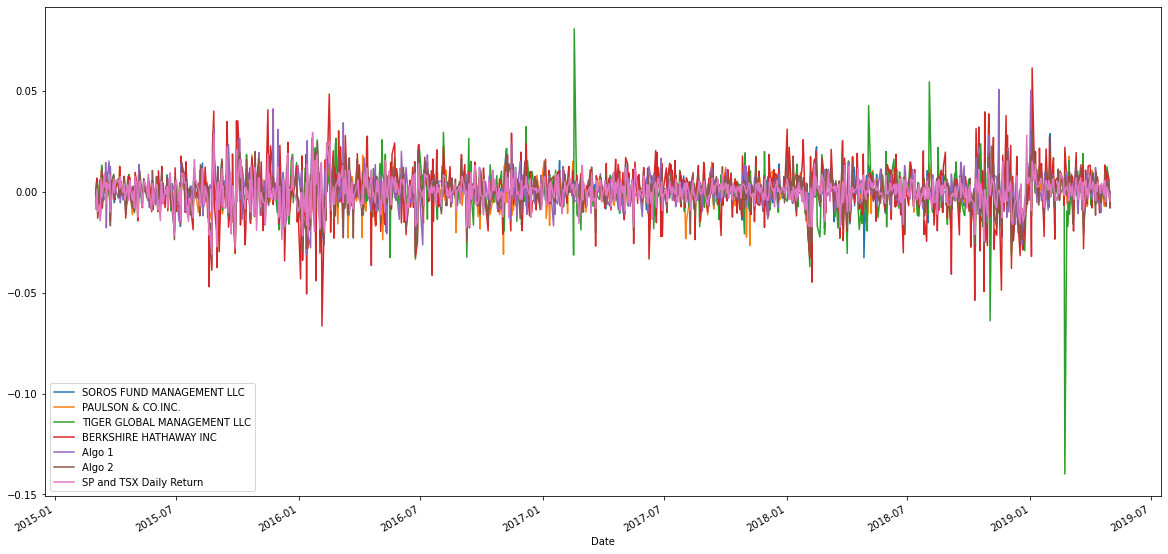

In [15]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

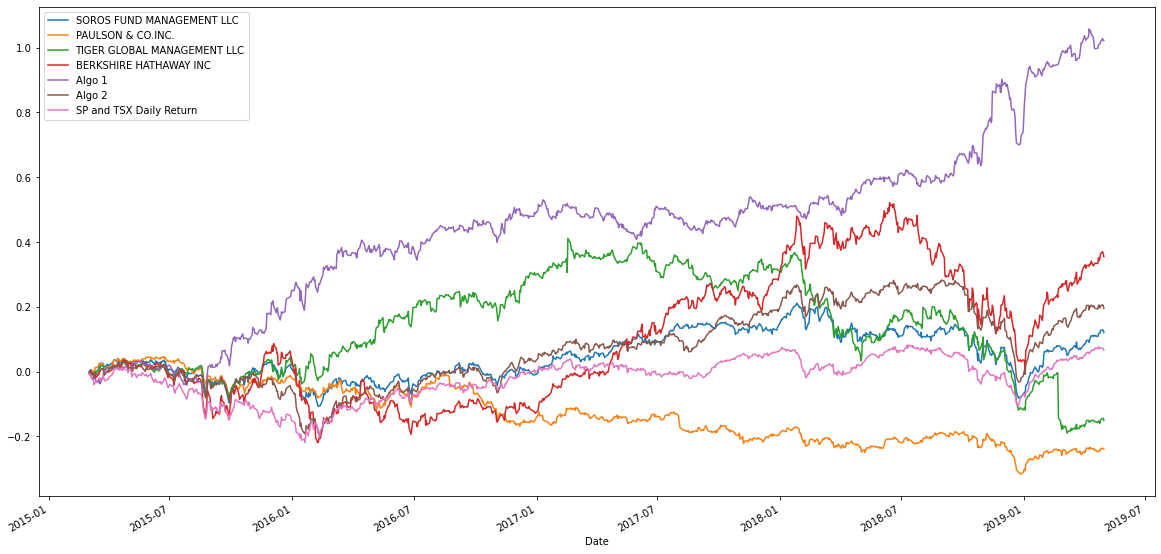

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_returns).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

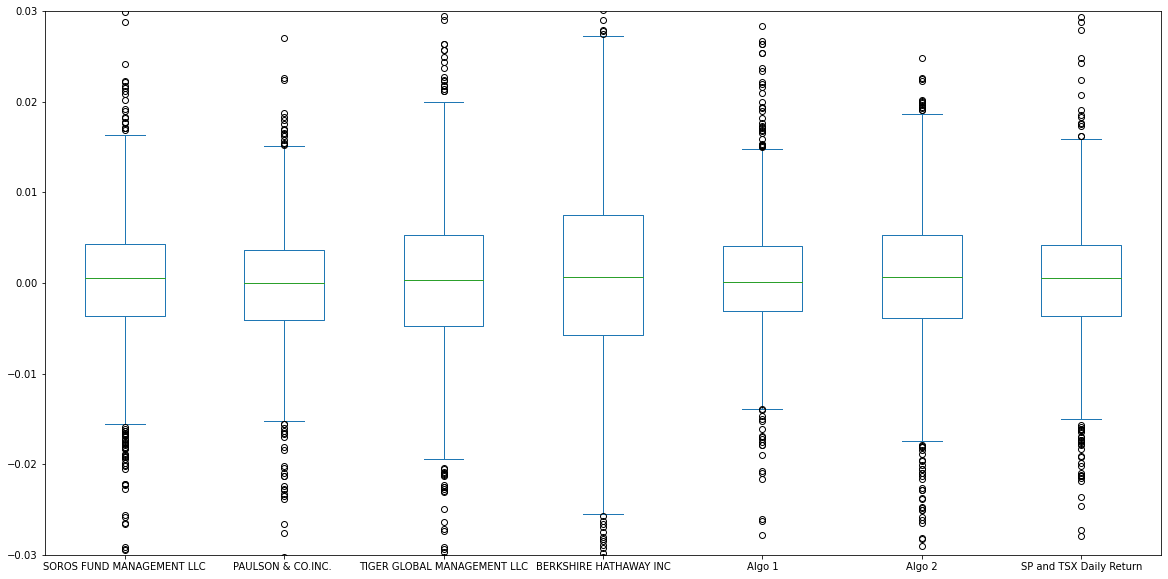

In [17]:
# Box plot to visually show risk
combined_returns.plot(kind="box",figsize=(20,10), ylim = [-0.03,0.03])


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std().sort_values(ascending=False)

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
 
# Determine which portfolios are riskier than the S&P TSX 60

#daily_std.loc['SP and TSX Daily Return']
risky_port = daily_std[daily_std>daily_std.loc['SP and TSX Daily Return']]
#All execept for PAULSON & CO.INC. 

risky_port

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std= daily_std* np.sqrt(252) 
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP and TSX Daily Return        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

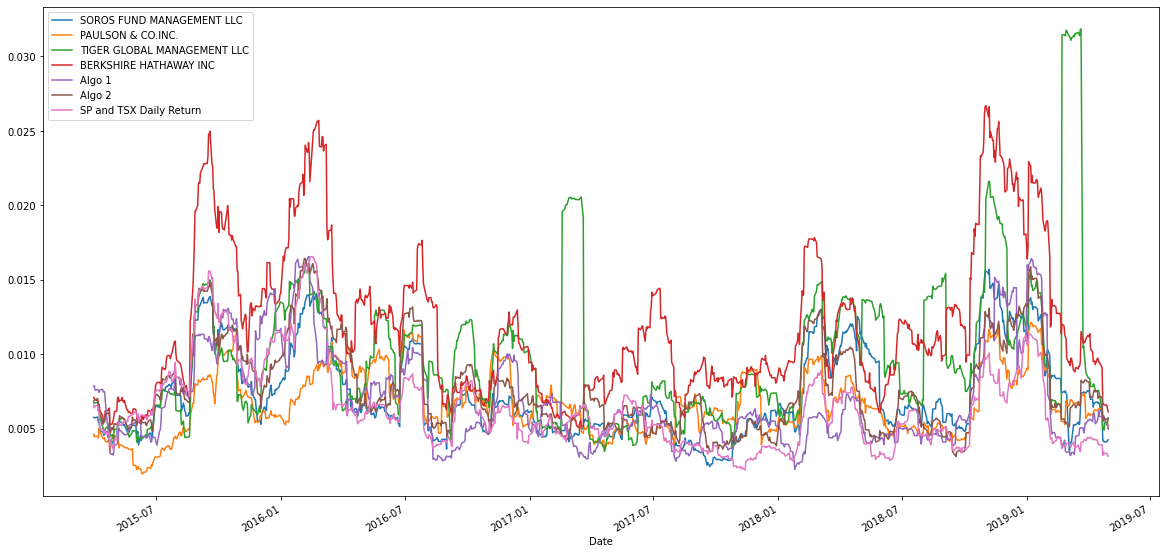

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(21).std()
rolling_std.dropna(inplace = True)
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))


### Calculate and plot the correlation

<AxesSubplot:>

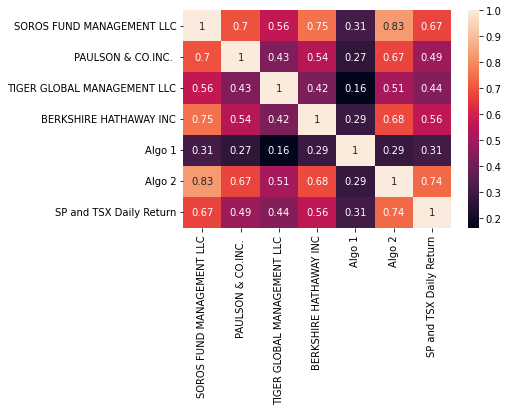

In [22]:
# Calculate the correlation
correlations = combined_returns.corr()
# Display de correlation matrix
sn.heatmap(correlations, annot=True)


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [23]:
# Calculate covariance of a single portfolio
whale_sp_tsx_cov = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['SP and TSX Daily Return'])
# Calculate variance of S&P TSX
sp_tsx_var = combined_returns['SP and TSX Daily Return'].var()
# Computing beta
whale_sp_tsx_beta = whale_sp_tsx_cov/sp_tsx_var
# Plot beta trend
whale_sp_tsx_beta

1.0160439091063613

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharp_ratios = (combined_returns.mean()-combined_returns['SP and TSX Daily Return'].mean())/(combined_returns.std())*np.sqrt(252)

<AxesSubplot:>

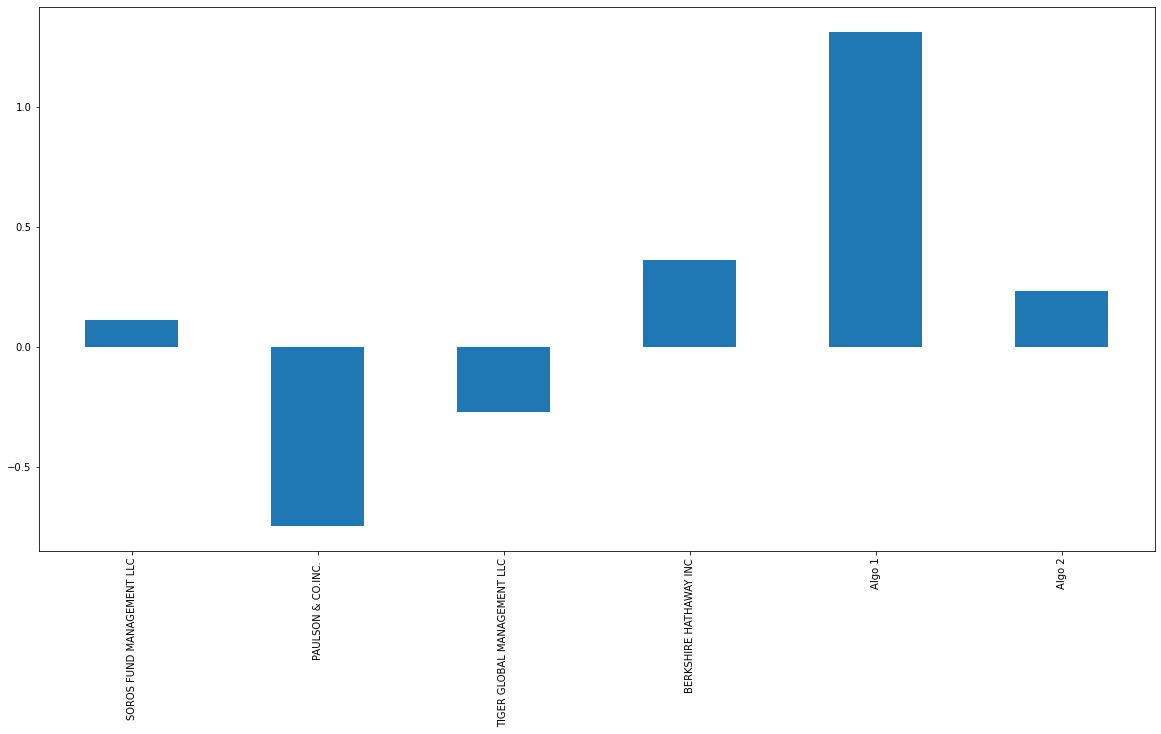

In [26]:
# Visualize the sharpe ratios as a bar plot
sharp_ratios[:-1].plot(kind ="bar", figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
alog1 does out perfrom all other portfolios while algo2 outerpfrom all but the Berkshire one.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
NVR_df = pd.read_csv('NVR.csv', index_col = 'Date',infer_datetime_format=True, parse_dates=True)
NVR_df.sort_values(by = 'Date',inplace = True)

In [28]:
# Reading data from 2nd stock
LEN_df = pd.read_csv('LEN.csv', index_col = 'Date',infer_datetime_format=True, parse_dates=True)
LEN_df.sort_values(by = 'Date',inplace = True)

In [29]:
# Reading data from 3rd stock
DHI_df = pd.read_csv('DHI.csv', index_col = 'Date',infer_datetime_format=True, parse_dates=True)
DHI_df.sort_values(by = 'Date', inplace = True)

In [62]:
# Combine all stocks in a single DataFrame
housing_df = pd.concat([NVR_df, LEN_df, DHI_df],axis=1, join = "inner")
housing_df.columns={'NVR','LEN','DHI'}


In [67]:
# Reset Date index
housing_df.index = pd.to_datetime(housing_df.index)

In [69]:
# Reorganize portfolio data by having a column per symbol
housing_df.index

DatetimeIndex(['2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-16', '2018-07-17', '2018-07-18',
               '2018-07-19', '2018-07-20',
               ...
               '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28', '2019-07-01', '2019-07-02',
               '2019-07-03', '2019-07-05'],
              dtype='datetime64[ns]', length=250, freq=None)

In [70]:
# Calculate daily returns
housing_returns = housing_df.pct_change()
# Drop NAs
housing_returns.dropna(inplace=True)
# Display sample data
housing_returns.head()

,DHI,LEN,NVR
2018-07-10,0.011920,-0.005125,-0.006934
2018-07-11,-0.012866,-0.006992,-0.008909
2018-07-12,0.005706,-0.003520,0.012148
2018-07-13,0.007014,0.005206,-0.004561
2018-07-16,-0.010262,-0.000185,0.012298


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [72]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_return= housing_returns.dot(weights)
# Display sample data
port_return.columns={'Date', 'Portfolio Returns'}
port_return.index = pd.to_datetime(port_return.index)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [73]:
# Join your returns DataFrame to the original returns DataFrame

all_returns = pd.concat([port_return,combined_returns], axis = 1, join = "inner")
all_returns.rename(columns= {0: 'Portfolio Return'}, inplace = True)
all_returns

,Portfolio Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP and TSX Daily Return
2018-07-10,-0.000046,0.000010,-0.001692,0.000457,-0.007234,-0.003640,-0.003929,0.005858
2018-07-11,-0.009589,-0.006965,-0.010102,-0.006040,-0.006874,0.001985,-0.007463,-0.007940
2018-07-12,0.004778,0.006349,0.004375,0.002512,0.010917,-0.002782,0.004078,0.009143
2018-07-13,0.002553,-0.001032,0.001025,0.002660,0.000283,-0.003196,0.001622,-0.000380
2018-07-16,0.000617,-0.000855,-0.005462,-0.011606,-0.002055,0.000977,-0.006062,-0.004009
...,...,...,...,...,...,...,...,...
2019-04-25,-0.029888,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003477,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002215,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,0.004015,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


In [74]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace = True)
all_returns

,Portfolio Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP and TSX Daily Return
2018-07-10,-0.000046,0.000010,-0.001692,0.000457,-0.007234,-0.003640,-0.003929,0.005858
2018-07-11,-0.009589,-0.006965,-0.010102,-0.006040,-0.006874,0.001985,-0.007463,-0.007940
2018-07-12,0.004778,0.006349,0.004375,0.002512,0.010917,-0.002782,0.004078,0.009143
2018-07-13,0.002553,-0.001032,0.001025,0.002660,0.000283,-0.003196,0.001622,-0.000380
2018-07-16,0.000617,-0.000855,-0.005462,-0.011606,-0.002055,0.000977,-0.006062,-0.004009
...,...,...,...,...,...,...,...,...
2019-04-25,-0.029888,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003477,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002215,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,0.004015,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [75]:
# Calculate the annualized `std`
annualized_std = all_returns.std()*np.sqrt(252)
annualized_std

Portfolio Return               0.279517
SOROS FUND MANAGEMENT LLC      0.146539
PAULSON & CO.INC.              0.118248
TIGER GLOBAL MANAGEMENT LLC    0.241709
BERKSHIRE HATHAWAY INC         0.250067
Algo 1                         0.139316
Algo 2                         0.141712
SP and TSX Daily Return        0.102788
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

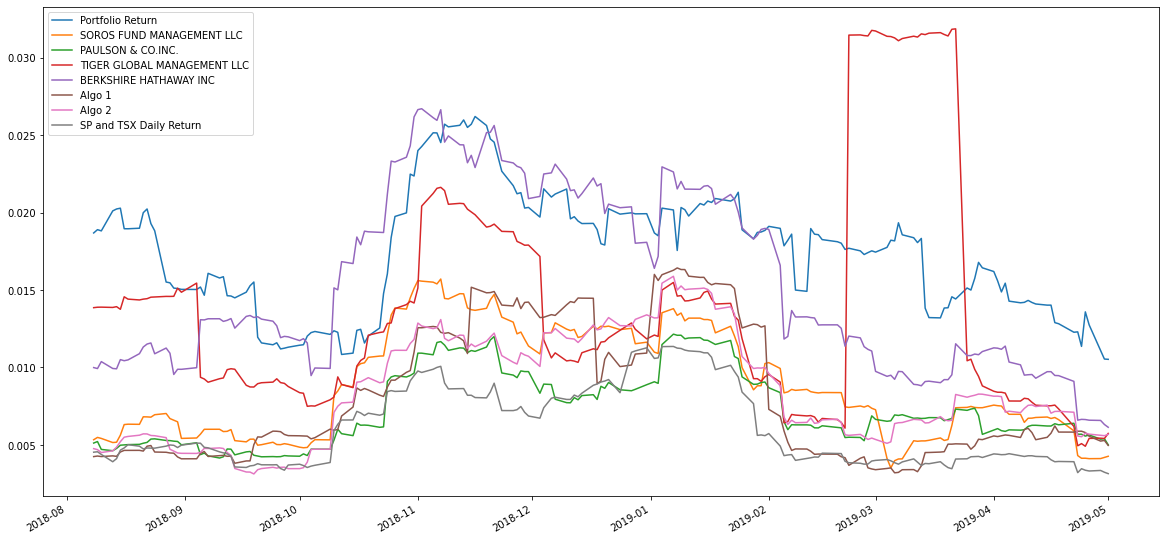

In [76]:
# Calculate rolling standard deviation
all_rolling_std = all_returns.rolling(21).std()
# Plot rolling standard deviation
all_rolling_std.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

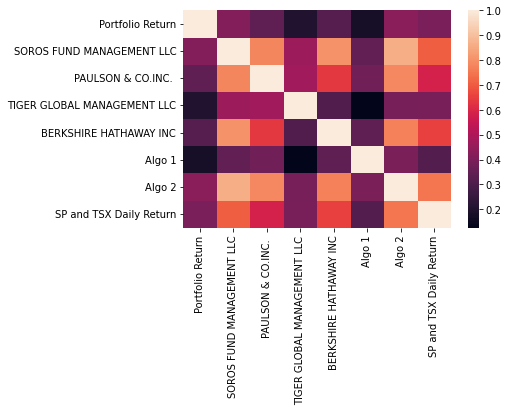

In [77]:
# Calculate and plot the correlation
all_corr=all_returns.corr()
sn.heatmap(all_corr)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:>

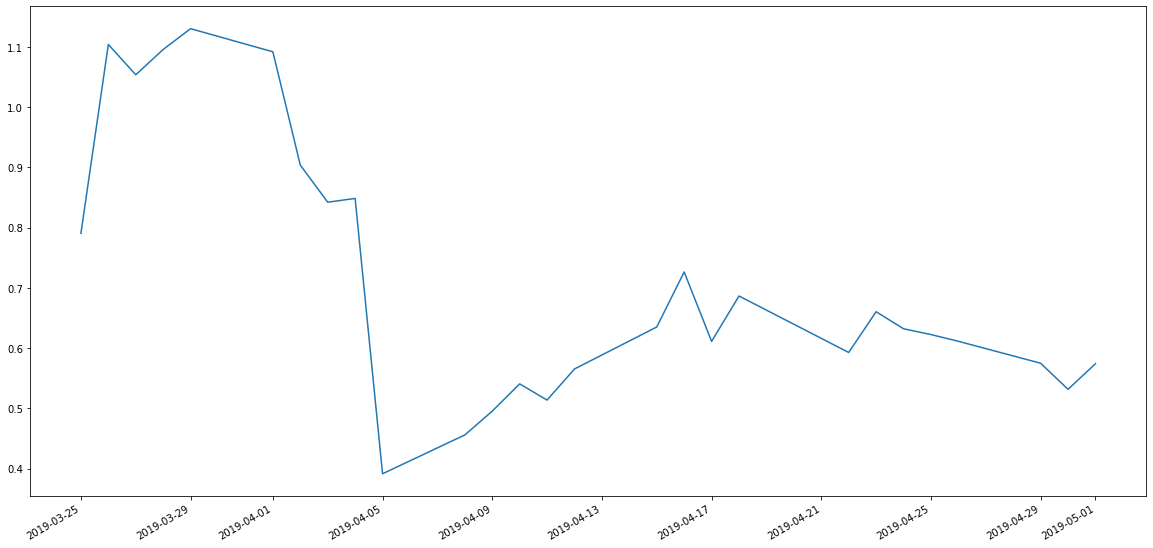

In [78]:
# Calculate and plot Beta
beta_port = port_return.rolling(60).cov(all_returns['SP and TSX Daily Return'])/all_returns['SP and TSX Daily Return'].rolling(60).var()
beta_port.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Calculate Annualized Sharpe Ratios
sharp_ratios = (all_returns.mean()-all_returns['SP and TSX Daily Return'].mean())/all_returns.std()
annualized_sharp_ratios = sharp_ratios *np.sqrt(252)
annualized_sharp_ratios

Portfolio Return               0.010993
SOROS FUND MANAGEMENT LLC     -0.054590
PAULSON & CO.INC.             -0.379823
TIGER GLOBAL MANAGEMENT LLC   -1.603928
BERKSHIRE HATHAWAY INC        -0.286811
Algo 1                         2.082452
Algo 2                        -0.446144
SP and TSX Daily Return        0.000000
dtype: float64

<AxesSubplot:>

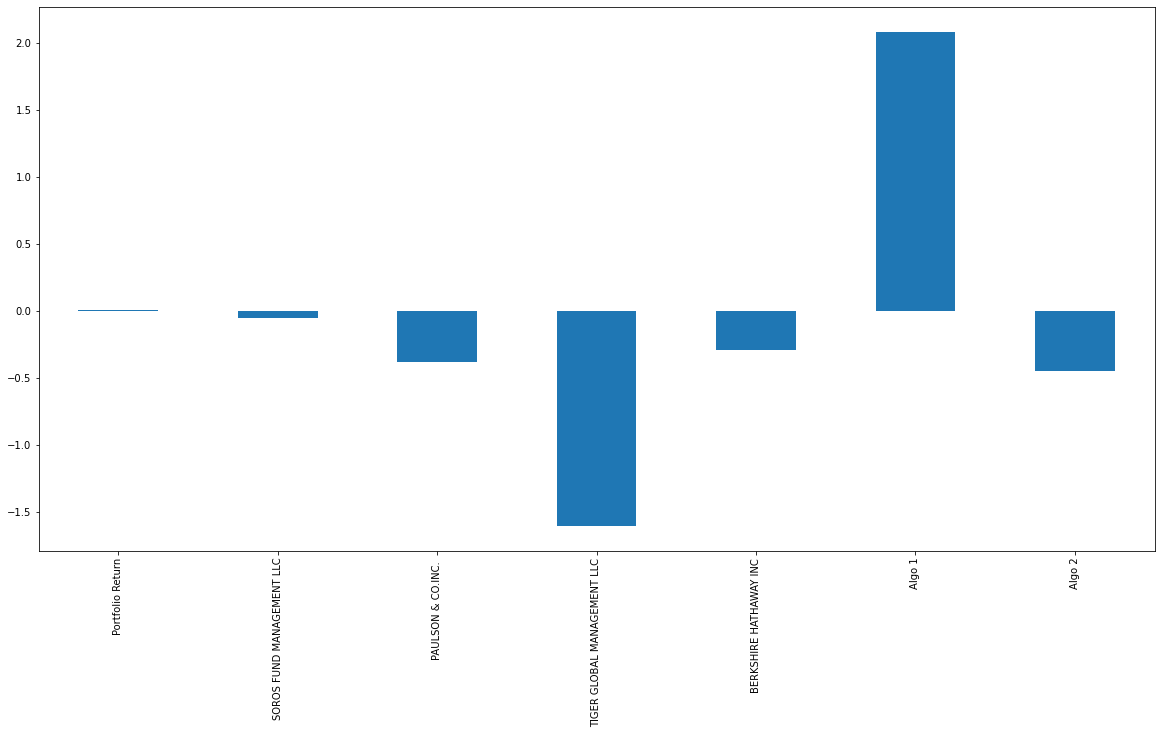

In [80]:
# Visualize the sharpe ratios as a bar plot
annualized_sharp_ratios[:-1].plot(kind = "bar", figsize = (20, 10))

### How does your portfolio do?

Write your answer here!

In [81]:
 #a little better than the S&P and TSX indexes but worse than alog1